## **6. Thresholding Techniques**


Thresholding is a simple but powerful image segmentation technique.
It converts a grayscale image into a binary image by comparing pixel intensities to a threshold value.

\
\begin{aligned}
g(x,y) &=
\begin{cases}
255, & \text{if } f(x,y) \ge T \\
0,   & \text{if } f(x,y) < T
\end{cases}
\end{aligned}

Where:

* f(x,y) → input grayscale pixel
* T → threshold
* g(x,y) → output binary pixel



## **6.1 Simple Global Thresholding**

Simple global thresholding applies one fixed threshold value to the entire grayscale image.
Each pixel is compared against this threshold and modified according to a predefined rule.

For a grayscale image f(x,y) and threshold T:
\
\begin{aligned}
g(x,y) &=
\begin{cases}
255, & \text{if } f(x,y) > T \\
0,   & \text{otherwise}
\end{cases}
\end{aligned}

Because the same threshold is used everywhere, this method assumes uniform illumination and clear intensity separation between foreground and background.

Different thresholding modes use the same threshold value but manipulate pixel intensities in different ways. A gradient image is especially useful to visualize these effects, since it contains the full range of grayscale values.

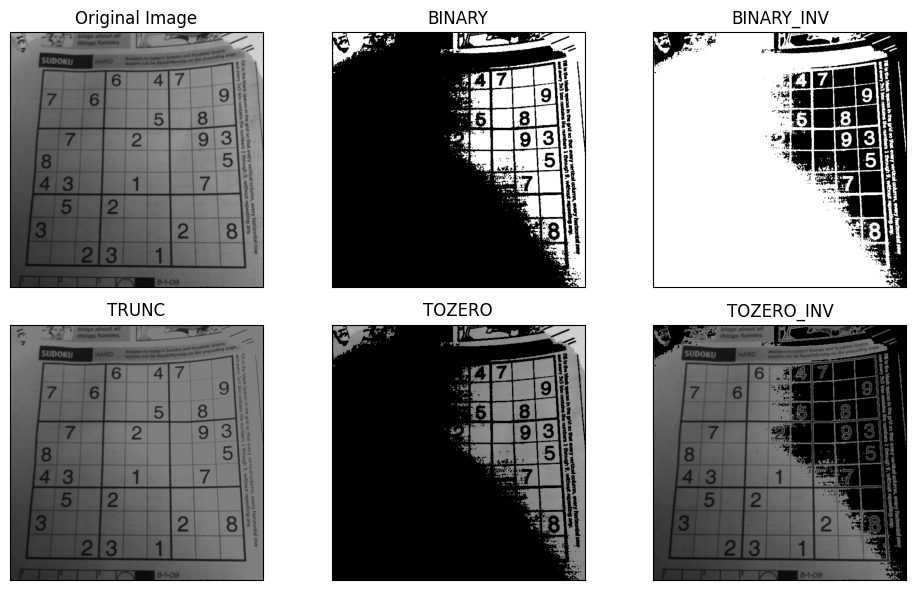

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check the path"

# Apply different thresholding techniques
T = 127

ret, thresh1 = cv.threshold(img, T, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, T, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, T, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, T, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, T, 255, cv.THRESH_TOZERO_INV)

# Titles for visualization
titles = [
    'Original Image',
    'BINARY',
    'BINARY_INV',
    'TRUNC',
    'TOZERO',
    'TOZERO_INV'
]

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Display results
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


## **6.2 Otsu’s Thresholding**

Otsu’s thresholding is an automatic global threshold selection method.
Instead of choosing the threshold value manually, the algorithm computes an optimal threshold directly from the image histogram.

The method assumes that the image contains two dominant intensity classes (foreground and background). It selects the threshold that best separates these two classes by minimizing the variance within each class, or equivalently, maximizing the variance between them.

In practice, Otsu’s method works well when the histogram is bimodal and illumination is reasonably uniform.

Because noise can distort the histogram, Otsu’s thresholding is often preceded by Gaussian smoothing.

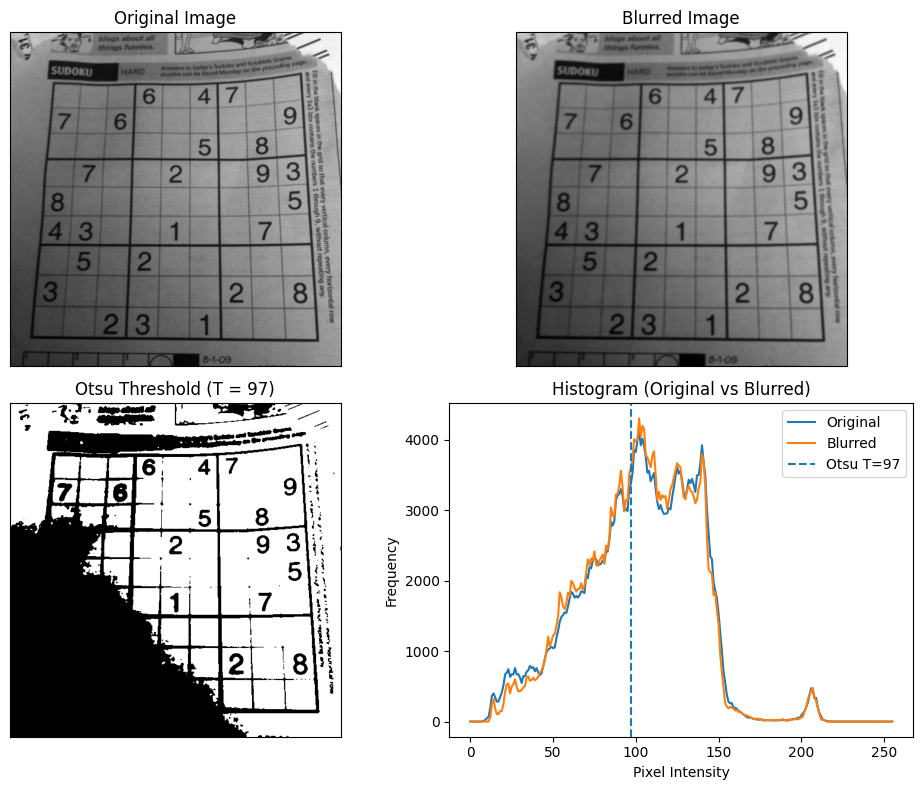

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

# Load image
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read"

# Preprocessing
blur = cv.GaussianBlur(img, (5, 5), 0)

# Otsu thresholding
T, otsu = cv.threshold(
    blur, 0, 255,
    cv.THRESH_BINARY + cv.THRESH_OTSU
)

# Histograms
hist_orig = cv.calcHist([img], [0], None, [256], [0, 256])
hist_blur = cv.calcHist([blur], [0], None, [256], [0, 256])

# Plot setup
titles = [
    "Original Image",
    "Blurred Image",
    f"Otsu Threshold (T = {int(T)})",
    "Histogram (Original vs Blurred)"
]

images = [img, blur, otsu]

plt.figure(figsize=(10, 8))

# Image plots
for i in range(3):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# Histogram plot
plt.subplot(2, 2, 4)
plt.plot(hist_orig, label="Original")
plt.plot(hist_blur, label="Blurred")
plt.axvline(T, linestyle='--', label=f"Otsu T={int(T)}")
plt.title(titles[3])
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


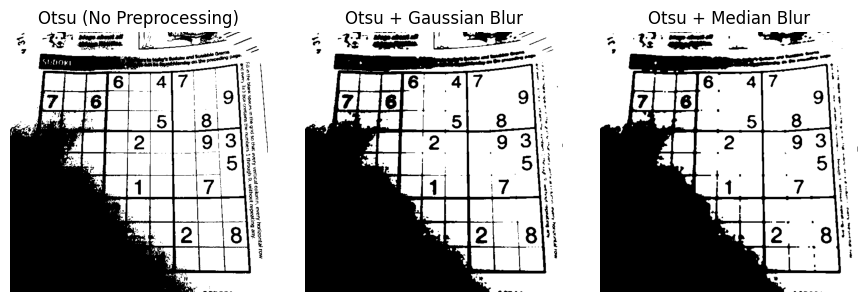

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None

blur_gauss = cv.GaussianBlur(img, (5, 5), 0)
blur_median = cv.medianBlur(img, 5)

_, otsu_raw = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
_, otsu_gauss = cv.threshold(blur_gauss, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
_, otsu_median = cv.threshold(blur_median, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

images = [otsu_raw, otsu_gauss, otsu_median]
titles = ["Otsu (No Preprocessing)", "Otsu + Gaussian Blur", "Otsu + Median Blur"]

plt.figure(figsize=(9,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


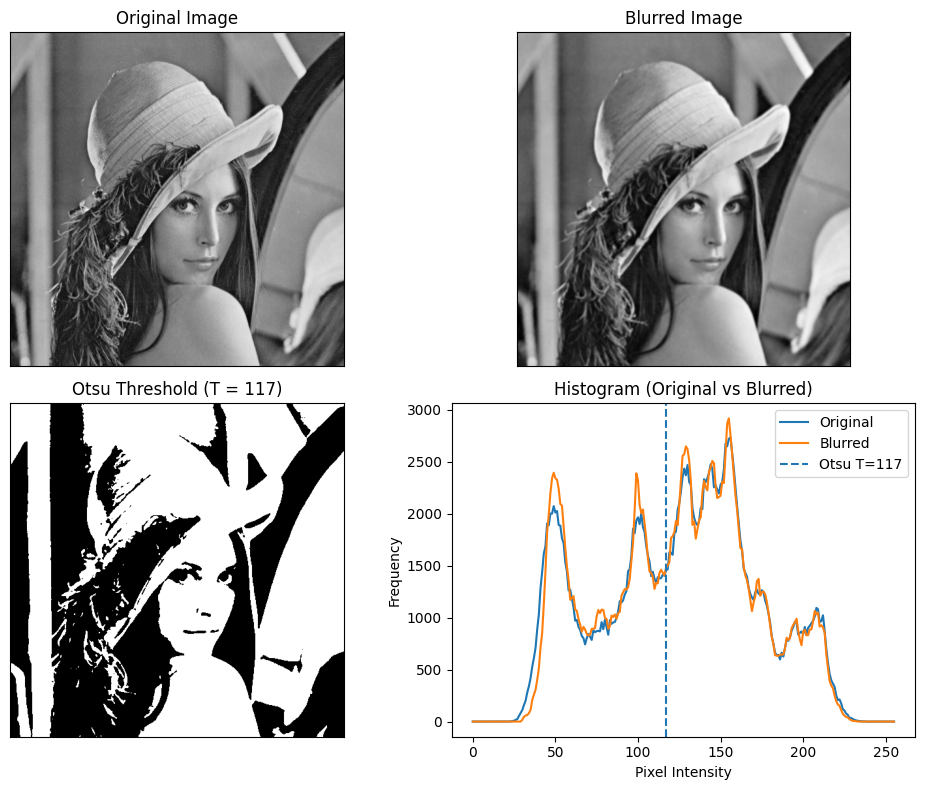

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

# Load image
img = cv.imread('lena.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read"

# Preprocessing
blur = cv.GaussianBlur(img, (5, 5), 0)

# Otsu thresholding
T, otsu = cv.threshold(
    blur, 0, 255,
    cv.THRESH_BINARY + cv.THRESH_OTSU
)

# Histograms
hist_orig = cv.calcHist([img], [0], None, [256], [0, 256])
hist_blur = cv.calcHist([blur], [0], None, [256], [0, 256])

# Plot setup
titles = [
    "Original Image",
    "Blurred Image",
    f"Otsu Threshold (T = {int(T)})",
    "Histogram (Original vs Blurred)"
]

images = [img, blur, otsu]

plt.figure(figsize=(10, 8))

# Image plots
for i in range(3):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# Histogram plot
plt.subplot(2, 2, 4)
plt.plot(hist_orig, label="Original")
plt.plot(hist_blur, label="Blurred")
plt.axvline(T, linestyle='--', label=f"Otsu T={int(T)}")
plt.title(titles[3])
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


## **6.3 Adaptive Thresholding**

Adaptive thresholding computes the threshold locally for each pixel, based on the intensity values in its neighborhood.
Unlike global methods, this approach is robust to non-uniform illumination, shadows, and gradual intensity changes.

Instead of a single threshold T, a different threshold T(x,y) is computed for each pixel:
$$
T(x, y) = \text{local statistic} - C
$$

where the local statistic is either the mean or a Gaussian-weighted mean of the surrounding pixels.

* Adaptive Mean uses the local average intensity.
* Adaptive Gaussian gives more weight to nearby pixels and is more stable near edges.
* Differences appear mainly around text, edges, and shadowed regions.


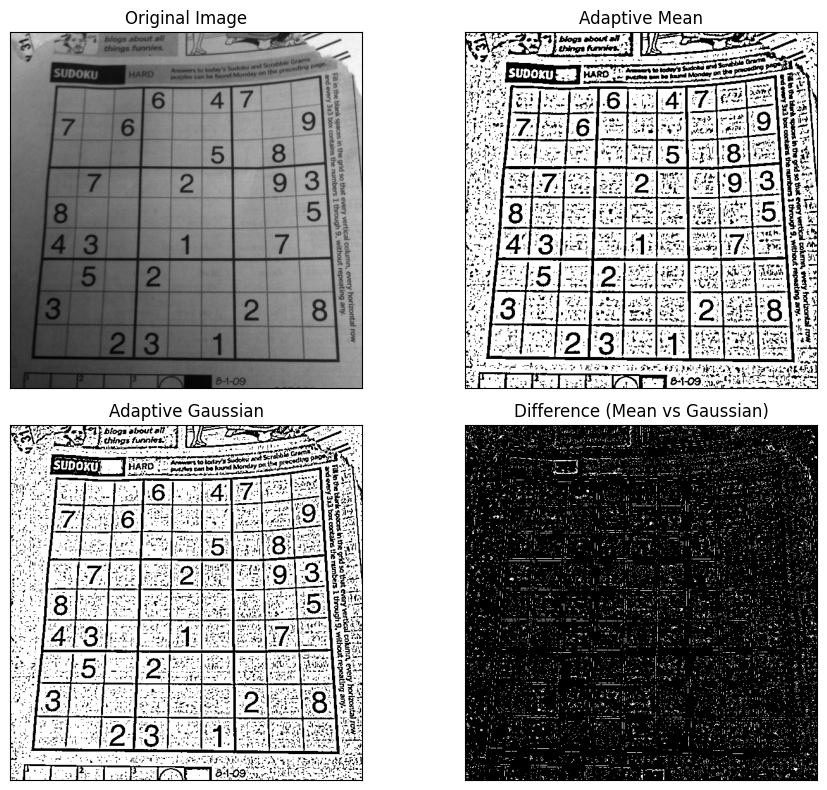

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

# Load grayscale image (try lena.png or sudoku.png)
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read"

# Adaptive thresholding
adaptive_mean = cv.adaptiveThreshold(
    img, 255,
    cv.ADAPTIVE_THRESH_MEAN_C,
    cv.THRESH_BINARY,
    blockSize=11,
    C=2
)

adaptive_gaussian = cv.adaptiveThreshold(
    img, 255,
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY,
    blockSize=11,
    C=2
)

# Plot
titles = [
    "Original Image",
    "Adaptive Mean",
    "Adaptive Gaussian",
    "Difference (Mean vs Gaussian)"
]

images = [
    img,
    adaptive_mean,
    adaptive_gaussian,
    cv.absdiff(adaptive_mean, adaptive_gaussian)
]

plt.figure(figsize=(10,8))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


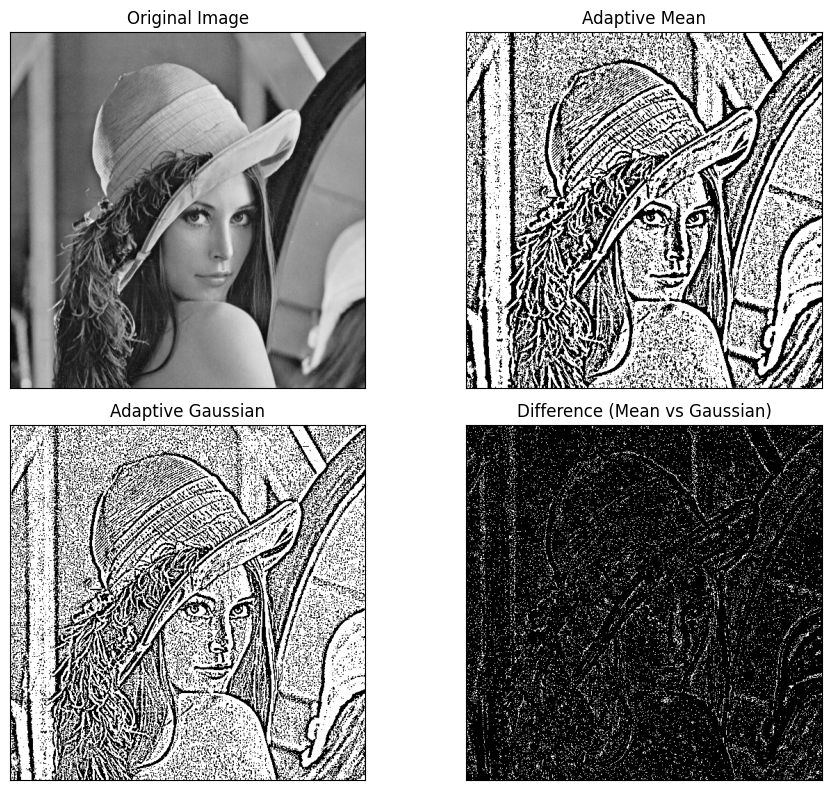

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

# Load grayscale image (try lena.png or sudoku.png)
img = cv.imread('lena.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read"

# Adaptive thresholding
adaptive_mean = cv.adaptiveThreshold(
    img, 255,
    cv.ADAPTIVE_THRESH_MEAN_C,
    cv.THRESH_BINARY,
    blockSize=11,
    C=2
)

adaptive_gaussian = cv.adaptiveThreshold(
    img, 255,
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY,
    blockSize=11,
    C=2
)

# Plot
titles = [
    "Original Image",
    "Adaptive Mean",
    "Adaptive Gaussian",
    "Difference (Mean vs Gaussian)"
]

images = [
    img,
    adaptive_mean,
    adaptive_gaussian,
    cv.absdiff(adaptive_mean, adaptive_gaussian)
]

plt.figure(figsize=(10,8))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
